### Project: Amazon pet supplies product reviews sentiment analysis using different models 
### Python version: 3.10.12



##### Import packages

In [2]:
import pandas as pd  
import re
import matplotlib as plt
import seaborn as sns
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer



In [3]:

# Read the JSON file line by line
with open('Pet_Supplies.json', 'r') as file:
    data = [json.loads(line) for line in file if line.strip()]


In [4]:
# Convert the list of dictionaries to a DataFrame
df_raw = pd.DataFrame(data)

In [5]:
df = df_raw.copy()

In [6]:
df.head(3)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,3.0,5,True,"09 27, 2007",A13K4OZKAAHOXS,0972585419,100indecisions,"Either my bird can't talk, or it really doesnt...",Still waiting for it to work...,1190851200,NaN,NaN
1,4.0,6,True,"08 25, 2007",A1DWYEX4P7GB7Z,0972585419,J. Weaver,The CD is a good idea for teaching a bird to s...,Feathered Phonics volume 1,1188000000,NaN,NaN
2,4.0,5,True,"02 20, 2007",A3NVN97YJSKEPC,0972585419,Theresa Ehrhardt,good cd to teach birds to talk and learn new w...,bird cd,1171929600,NaN,NaN


In [7]:
reviews = df[["overall", "reviewText"]]
print(reviews)

         overall                                         reviewText
0            3.0  Either my bird can't talk, or it really doesnt...
1            4.0  The CD is a good idea for teaching a bird to s...
2            4.0  good cd to teach birds to talk and learn new w...
3            1.0  I was not happy with product would like to ret...
4            1.0  This cd is scratched and it constantly skips. ...
...          ...                                                ...
6542478      5.0        Great leash...should last a very long time.
6542479      5.0  The leash arrived on time and was exactly what...
6542480      4.0  Pretty good quality lead. Slightly stretchy, b...
6542481      5.0                                     Great leash...
6542482      4.0  It's a bit stretchy for leather, but made nicely.

[6542483 rows x 2 columns]


In [8]:
reviews.shape

(6542483, 2)

In [9]:
reviews.isnull().sum()

overall          0
reviewText    3796
dtype: int64

In [27]:
review = reviews.dropna()
print(review.shape)

(6538687, 2)


In [28]:
review.dtypes

overall       float64
reviewText     object
dtype: object

###  classify rating stars < 3 as negative review ("0")

In [29]:
review.loc[review["overall"] < 3.0, 'overall'] = 0

###  classify rating score > 3 as posotive review ("1")

In [30]:
review.loc[review["overall"] > 3.0, 'overall'] = 1

###  classify rating score = 3 as neutral review ("2")

In [31]:
review.loc[review["overall"] == 3.0, 'overall'] = 2

### Check class if balance

In [32]:
review[["overall"]].value_counts()

overall
1.0        5007910
0.0        1014556
2.0         516221
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

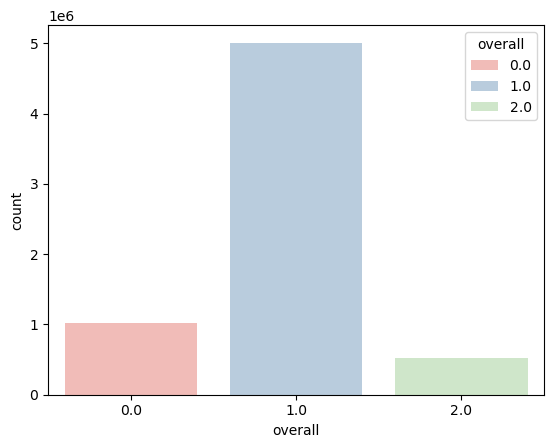

In [15]:
sns.countplot(data=review, x='overall',hue="overall", palette="Pastel1")

### Text preprocessing 

In [33]:
review[["reviewText"]].head(1)

,reviewText
0,"Either my bird can't talk, or it really doesnt..."


In [35]:

def data_preprocess(text):
    text =  RegexpTokenizer(r'\w+|$[0-9.]+|\S+').tokenize(text.lower())
    text = ' '.join(text)
    return text

In [36]:
review['Text'] = review.loc[:, 'reviewText'].apply(data_preprocess)
review.head(10)

/tmp/ipykernel_21479/297975594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['Text'] = review.loc[:, 'reviewText'].apply(data_preprocess)


,overall,reviewText,Text
0,2.0,"Either my bird can't talk, or it really doesnt...","either my bird can 't talk , or it really does..."
1,1.0,The CD is a good idea for teaching a bird to s...,the cd is a good idea for teaching a bird to s...
2,1.0,good cd to teach birds to talk and learn new w...,good cd to teach birds to talk and learn new w...
3,0.0,I was not happy with product would like to ret...,i was not happy with product would like to ret...
4,0.0,This cd is scratched and it constantly skips. ...,this cd is scratched and it constantly skips ....
5,1.0,It works just fine and repeats when I'm not he...,it works just fine and repeats when i 'm not h...
6,2.0,I purchased this cd for my Pocket Parrot. It h...,i purchased this cd for my pocket parrot . it ...
7,2.0,"Maybe it's just my Amazon parrot, but she's no...","maybe it 's just my amazon parrot , but she 's..."
8,1.0,I bought this to help me teach my blue quaker ...,i bought this to help me teach my blue quaker ...
9,2.0,Bird showed no interest in it....,bird showed no interest in it ....


In [37]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(words):
    words = words.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = ' '.join(words)
    return words

In [38]:
review['Text'] = review.loc[:,'Text'].apply(preprocess)
review.head()

# would explore a faster way to do

/tmp/ipykernel_21479/708803845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['Text'] = review.loc[:,'Text'].apply(preprocess)


,overall,reviewText,Text
0,2.0,"Either my bird can't talk, or it really doesnt...","either bird 't talk , really doesnt want say ""..."
1,1.0,The CD is a good idea for teaching a bird to s...,"cd good idea teaching bird speak ,but word wou..."
2,1.0,good cd to teach birds to talk and learn new w...,good cd teach bird talk learn new word . keep ...
3,0.0,I was not happy with product would like to ret...,happy product would like return work
4,0.0,This cd is scratched and it constantly skips. ...,cd scratched constantly skip . disappointed


In [42]:
import keras


2023-11-30 22:41:51.803008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 22:41:51.803063: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 22:41:51.952615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 22:41:52.225767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 22:41:53.715493: W tensorflow/compiler/tf2